# EDA and Performance evaluation

### Nato assignment - Data Scientist position nr 210393

#### Aircrafts classification model

Giulia Violatto

In [1]:
import torch
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split, StratifiedKFold
from torchvision.models import resnet50

### Import labels file

In [2]:
# Load labels

label_path = Path(r'C:\Users\giuli\Documents\NATO_Dataset\labels\labels_total.csv')
labels = pd.read_csv(label_path)

In [3]:
labels.head()

,filename,isnato
0,27af5e2f7ff0875d39fbf3d94fcf35b8,1
1,414162b1c5414b5b3a2622a993d7ac1e,0
2,28edf9a9a04732efc5401b722daf411e,1
3,1449ed1726c3f56fffe518244afcc828,0
4,2de55be779b4ea8c388ae3839ed05c68,1


In [4]:
print('Nr images in dataset = ', len(labels), '\n')

print('NATO aircrafts = ', len(labels.loc[labels['isnato'] == 1]))
print('non-NATO aircrafts = ', len(labels.loc[labels['isnato'] == 0]))

Nr images in dataset =  1536 

NATO aircrafts =  1200
non-NATO aircrafts =  336


### Train/test split

In [5]:
# create Train/Test split with same relative class frequencies

train_df, test_df = train_test_split(labels, 
                            test_size=0.1,
                            random_state=11,
                            stratify=labels['isnato'])

print('train = ', len(train_df))
print('test_df = ', len(test_df))

train =  1382
test_df =  154


In [6]:
print('Train')
print('NATO aircrafts = ', len(train_df.loc[train_df['isnato'] == 1]))
print('non-NATO aircrafts = ', len(train_df.loc[train_df['isnato'] == 0]), '\n')

print('Test')
print('NATO aircrafts = ', len(test_df.loc[test_df['isnato'] == 1]))
print('non-NATO aircrafts = ', len(test_df.loc[test_df['isnato'] == 0]))

Train
NATO aircrafts =  1080
non-NATO aircrafts =  302 

Test
NATO aircrafts =  120
non-NATO aircrafts =  34


#### Save to csv file

In [7]:
# # create folder

# labels_folder = Path(r'C:\Users\giuli\Documents\NATO_Dataset\labels')
# train_file = labels_folder / 'labels_train.csv'

# # save train csv
# train_df.to_csv(train_file, 
#                 index=False)

# # save test csv
# test_file = labels_folder / 'labels_test.csv'
# test_df.to_csv(test_file, 
#                 index=False)

### Train/val split: k-fold validation

In [8]:
# Train/val split using k-fold: same class frequency
skf = StratifiedKFold(n_splits=3,
                      shuffle=True,
                      random_state=11)

for ind, (train_index, val_index) in enumerate(skf.split(train_df["filename"], train_df["isnato"])):

    # Choose a particular split
    if ind == 0:

        # Sliced dataframes with image_paths and labels
        train_samples = labels.iloc[train_index, :].reset_index(drop=True)
        val_samples = labels.iloc[val_index, :].reset_index(drop=True)

In [9]:
train_samples

,filename,isnato
0,27af5e2f7ff0875d39fbf3d94fcf35b8,1
1,414162b1c5414b5b3a2622a993d7ac1e,0
2,28edf9a9a04732efc5401b722daf411e,1
3,1449ed1726c3f56fffe518244afcc828,0
4,2de55be779b4ea8c388ae3839ed05c68,1
...,...,...
916,713b0c5a7ae97a7fe0c6a0dd0e5db1d0,1
917,18151ea693519631eff8145adc6e1c1b,1
918,29e9636c846f7ff92296d4a0a99a4da0,1
919,6ab2a802b87934018935a4388aa9176b,0


In [10]:
val_samples

,filename,isnato
0,1e564f0f7ddb995e6818ac0062728f35,0
1,f6dbde8b4efb205dd8ce3dee7f602b82,0
2,85a5ace516eaeb0b522d55f1c1aef9ff,1
3,20303f46b82e6f410cf0989f529be778,1
4,7107d0b94beb550860516e5a14075372,1
...,...,...
456,938130539c9d75835bc04075cb020431,1
457,3dbf1cd0fcb0fdac62530779fffb8124,1
458,edfc0b2d63284355ef246c135d912edf,1
459,224fe3fb519b2d7a892a10a12893b2f6,1


### Model

In [11]:
# ResNet50 pretrained on ImageNet

model = resnet50(pretrained=True)

In [12]:
# Model Architecture

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Performance evaluation

In [13]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, average_precision_score, f1_score

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Load result

result_path = Path(r'performance evaluation/results_version1.csv')
result_df = pd.read_csv(result_path)

In [25]:
print('Nr test images = ' , len(result_df))

Nr test images =  154


In [26]:
# Confusion matrix

true_labels = result_df['True_labels'].tolist()
pred_labels = result_df['Pred_labels'].tolist()

conf_matr_normalized = confusion_matrix(true_labels, pred_labels, normalize='true')
conf_matr = confusion_matrix(true_labels, pred_labels)

In [27]:
[tn, fp], [fn, tp] = conf_matr

print('TN = ', tn)
print('FP = ', fp)
print('FN = ', fn)
print('TP = ', tp)

TN =  28
FP =  6
FN =  27
TP =  93


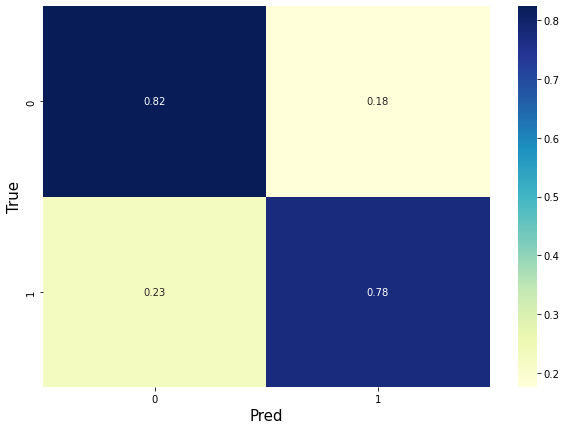

In [28]:
# Plot confusion matrix

df_cm = pd.DataFrame(conf_matr_normalized,
                     index=['0', '1'],
                     columns = ['0', '1'])


plt.figure(figsize = (10,7))


ax = sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

plt.xlabel('Pred',  fontsize = 15)
plt.ylabel('True',  fontsize = 15)

plt.show()

# plt.savefig(r'performance evaluation\conf_matrix.jpg')

In [29]:
# TRP, TNR, precision, recall
TRP = tp / (fn + tp)
TNR = tn / (tn + fp)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print('True Positive Rate = ', round(TRP, 2))
print('True Negative Rate = ', round(TNR, 2), '\n')


print('Precision = ', round(precision, 2))
print('Recall = ', round(recall, 2))


True Positive Rate =  0.78
True Negative Rate =  0.82 

Precision =  0.94
Recall =  0.78


In [30]:
# Average precision (AP), F1-score

average_precision = average_precision_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print('average_precision = ', round(average_precision, 2))
print('f1 = ', round(f1, 2))

average_precision =  0.9
f1 =  0.85
